# **Chapter 7. Secular Perturbations**

## **Action by Daniel Niño-Villegas, University of Antioquia**

In this notebook we will present part of the theoretical background of the chapter devoted to *Secular Perturbations* and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

## Preliminaries

### Prerrequisites

In [1]:
#!pip install -q rebound
#!pip install -q Fraction
#!pip install -q ipywidgets

### Other libraries

In [2]:
#Global packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import rebound as rb
import celluloid as cell
from secular import *

#Specific modules and routines
from tqdm import tqdm
from ipywidgets import interact, widgets, fixed
from fractions import Fraction
from IPython.core.display import HTML

### Useful constants

In [3]:
deg = np.pi/180
rad = 1/deg

### Plots aesthetics

In [4]:
%matplotlib nbagg
#If you run this in Colab use
#%matplotlib inline

plt.rcParams['text.usetex'] = True
#If you don't have installed latex
#font for matplotlib, set this parameter
#to false. If you run this in Colab, set
#this parameter to false.

## **Section 7.2 Secular Perturbations for Two Planets**

### Experiment: Laplace coefficients study (7.1)

<p align="justify"> In $\S$6.9 we introduced the computation of the Laplace coefficients and their derivatives (up to second order), who are completely essential in the development of perturbation theory. This functions are until now completely "dark" in a sense that we don't know how they behave or even how their derivatives behave. So, we´ll now show an interactive plot of $b_{s}^{(j)}(\alpha)$, $D \, b_{s}^{(j)}(\alpha)$ and $D^2 \, b_{s}^{(j)}(\alpha)$ where you can modify the parameters $s$ and $j$ to see how the coefficents change: </p>

In [5]:
def blap_plot(s,j):
    a = np.linspace(0, 0.9, 1000)
    b = np.array([blap(x, s, j) for x in a])
    db = np.array([blap_dot(x, s, j) for x in a])
    ddb = np.array([blap_ddot(x, s, j) for x in a])
    
    j = int(j)
    s = str(Fraction(s).numerator) + '/' + str(Fraction(s).denominator)
    ss = fr'$s = {s}$' + r'$\hspace{20 pt}$' fr'$j = {j}$'
    
    plt.close()
    fig, axs = plt.subplots(3, 1, figsize=(4,6), sharex=True, dpi=110)
    axs[0].set_title(ss, fontsize=15)
    axs[0].set_ylabel(r'$b_{s}^{(j)}(\alpha)$', fontsize=17)
    axs[0].plot(a, b, 'k-')
    axs[1].set_xlabel(r'$\alpha$', fontsize=15)
    axs[1].set_ylabel(r'$D \, b_{s}^{(j)}(\alpha)$', fontsize=15)
    axs[1].plot(a, db, 'k-')
    axs[2].set_xlabel(r'$\alpha$', fontsize=15)
    axs[2].set_ylabel(r'$D^2 \, b_{s}^{(j)}(\alpha)$', fontsize=15)
    axs[2].plot(a, ddb, 'k-')
    fig.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.show()

In [6]:
opciones = dict(continuous_update=False)
interact(blap_plot,
         s = widgets.FloatSlider(min=0.5, max=5, step=0.5, value=0.5, **opciones),
         j = widgets.FloatSlider(min=0, max=5, step=1, value=0, **opciones))

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='s', max=5.0, min=0.5, step=…

<function __main__.blap_plot(s, j)>

<p align="justify"> An important result of the previous plots is that the Laplace coefficients diverge rapidly near $\alpha = 1$, and so their derivatives. You can also check that if you increase the value of the $s$ parameter, the coefficient is virtually cero for a large number of $\alpha$ values, and diverge much quickly near $\alpha=1$. Be free to combine different parameter values to check all of this for yourself. </p>

### Experiment: excentricity and inclination vectors (7.2)

For the following experiment we'll suppose a system made up with a central body of mass $m_c$ and two orbiting bodies with masses $m_1$ and $m_2$, where $m_1 \ll m_c$ and $m_2 \ll m_c$; for convention we'll take the inner body to be $m_1$ and the outter body to be $m_2$. In the previous notebook we developed the theory for a similar system where $m_1 \ll m_2$, but now we'll describe the motion for two particles ignoring this condition.  Let's write the disturbing function for both bodies like we did before:

Initial conditions:

\begin{equation*}
\mathcal{R}_1 = \frac{G m_2}{a_1} \alpha_{12} \mathcal{R}_{\mathrm{D}}^{(\text{sec})}, \hspace{1 cm} \mathcal{R}_2 = \frac{G m_1}{a_2} \mathcal{R}_{\mathrm{D}}^{(\text{sec})} \tag{1} \label{eq:dist_funcs}
\end{equation*}

Where:

\begin{equation*}
\begin{aligned}
\mathcal{R}_{\mathrm{D}}^{(\mathrm{sec})}= & \frac{1}{8}\left[2 \alpha_{12} D+\alpha_{12}^2 D^2\right] b_{\frac{1}{2}}^{(0)}\left(e_1^2+e_2^2\right)-\frac{1}{2} \alpha_{12} b_{3 / 2}^{(1)}\left(s_1^2+s_2^2\right) \\
& +\frac{1}{4}\left[2-2 \alpha_{12} D-\alpha_{12}^2 D^2\right] b_{\frac{1}{2}}^{(1)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& +\alpha_{12} b_{3 / 2}^{(1)} s_1 s_2 \cos \left(\Omega_1-\Omega_2\right)
\end{aligned} \tag{2} \label{eq:dist_direct1}
\end{equation*}

Note that we've dropped the $\frac{1}{2} b_{\frac{1}{2}}^{(0)}(\alpha)$ term in $\mathcal{R}_{\mathrm{D}}^{(\mathrm{sec})}$ due to the fact that Lagrange's equations for $a_1$ and $a_2$ are proportional to $\frac{\partial \mathcal{R}}{\partial \lambda_j}$, and in a secular regime we won´t consider terms asociated with the mean anomalies. Using the recursion relations for the Laplace coefficients it can be found that:

\begin{equation*}
2 \alpha \frac{\mathrm{d} b_{1 / 2}^{(0)}}{\mathrm{d} \alpha}+\alpha^2 \frac{\mathrm{d}^2 b_{1 / 2}^{(0)}}{\mathrm{d} \alpha^2} = \alpha b_{3/2}^{(1)} \tag{3} \label{eq:lap_1}
\end{equation*}

\begin{equation*}
2 b_{1/2}^{(1)}-2 \alpha \frac{\mathrm{d} b_{1/2}^{(1)}}{\mathrm{d} \alpha}-\alpha^2 \frac{\mathrm{d}^2 b_{1 / 2}^{(1)}}{\mathrm{d} \alpha^2} = -\alpha b_{3/2}^{(2)} \tag{4} \label{eq:lap_2}
\end{equation*}

Plugging \eqref{eq:lap_1} and \eqref{eq:lap_2} in \eqref{eq:dist_direct1} we find that:

\begin{equation*}
\begin{aligned}
\mathcal{R}_{\mathrm{D}}^{(\mathrm{sec})}= & \frac{1}{8}\alpha b_{3 / 2}^{(1)}\left(e_1^2+e_2^2\right)-\frac{1}{2} \alpha_{12} b_{3 / 2}^{(1)}\left(s_1^2+s_2^2\right) \\
& - \frac{1}{4} \alpha b_{3 / 2}^{(2)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& +\alpha_{12} b_{3 / 2}^{(1)} s_1 s_2 \cos \left(\Omega_1-\Omega_2\right)
\end{aligned} \tag{5} \label{eq:dist_direct2}
\end{equation*}

Now we can replace \eqref{eq:dist_direct2} in eqs. \eqref{eq:dist_funcs}:

\begin{equation*}
\begin{aligned}
\mathcal{R}_1 = \frac{G m_2}{a_1} & {\left[\frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} (e_1^2 + e_2^2)-\frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} (s_1^2 + s_2^2) \right.} \\
& -\frac{1}{4} \alpha_{12}^2 b_{3 / 2}^{(2)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& \left.+\frac{1}{4} \alpha_{12}^2 b_{3 / 2}^{(1)} I_1 I_2 \cos \left(\Omega_1-\Omega_2\right)\right]
\end{aligned} \tag{6} \label{dist_func1.1}
\end{equation*}

\begin{equation*}
\begin{aligned}
\mathcal{R}_2 = \frac{G m_1}{a_2} & {\left[\frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} (e_1^2 + e_2^2) - \frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} (s_1^2 + s_2^2) \right.} \\
& -\frac{1}{4} \alpha_{12} b_{3 / 2}^{(2)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& \left.+\frac{1}{4} \alpha_{12} b_{3 / 2}^{(1)} I_1 I_2 \cos \left(\Omega_1-\Omega_2\right)\right]
\end{aligned} \tag{7} \label{dist_func2.1}
\end{equation*}

With this equations, we can now do a little handling:

\begin{equation*}
\begin{aligned}
\mathcal{R}_1 = \frac{G m_2}{a_1} & {\left[\frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} e_1^2-\frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} s_1^2 \right.} \\
& -\frac{1}{4} \alpha_{12}^2 b_{3 / 2}^{(2)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& \left.+\frac{1}{4} \alpha_{12}^2 b_{3 / 2}^{(1)} I_1 I_2 \cos \left(\Omega_1-\Omega_2\right)\right] \\
& +  \underbrace{\frac{G m_2}{a_1} \left[ \frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} e_2^2 - \frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} s_2^2 \right]}
\end{aligned} \tag{8} \label{dist_func1.2}
\end{equation*}

\begin{equation*}
\begin{aligned}
\mathcal{R}_2 = \frac{G m_1}{a_2} & {\left[\frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} e_2^2 - \frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} s_2^2 \right.} \\
& -\frac{1}{4} \alpha_{12} b_{3 / 2}^{(2)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& \left.+\frac{1}{4} \alpha_{12} b_{3 / 2}^{(1)} I_1 I_2 \cos \left(\Omega_1-\Omega_2\right)\right] \\
& + \underbrace{\frac{G m_1}{a_2} \left[ \frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} e_1^2 - \frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} s_1^2 \right]}
\end{aligned} \tag{9} \label{dist_func2.2}
\end{equation*}

You can surely note that the underlined terms will have no effect in the Lagrange's equations because they point to the other particle, so the derivatives of these will be zero. Now we'll use Kepler's third law approximation:

\begin{equation*}
G(m_c + m_1) \approx n_1^2 a_1^3, \hspace{0.5 cm} G(m_c + m_2) \approx n_2^2 a_2^3
\end{equation*}

This yields:

\begin{equation*}
\frac{G}{a_1} = \frac{n_1^2 a_1^2}{m_c+m_1}, \hspace{0.5 cm} \frac{G}{a_2} = \frac{n_2^2 a_2^2}{m_c+m_2} \tag{10} \label{eq:kepler}
\end{equation*}

Replacing \eqref{eq:kepler} in \eqref{dist_func1.2} and \eqref{dist_func2.2}, and assuming that the approximations $s_1 \approx \frac12 I_1$, $s_2 \approx \frac12 I_2$ are valid we get:

\begin{equation*}
\begin{aligned}
\mathcal{R}_1=n_1^2 a_1^2 \frac{m_2}{m_{\mathrm{c}}+m_1} & {\left[\frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} e_1^2-\frac{1}{8} \alpha_{12}^2 b_{3 / 2}^{(1)} I_1^2\right.} \\
& -\frac{1}{4} \alpha_{12}^2 b_{3 / 2}^{(2)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& \left.+\frac{1}{4} \alpha_{12}^2 b_{3 / 2}^{(1)} I_1 I_2 \cos \left(\Omega_1-\Omega_2\right)\right]
\end{aligned} \tag{11} \label{eq:dist_func1.3}
\end{equation*}

\begin{equation*}
\begin{aligned}
\mathcal{R}_2=n_2^2 a_2^2 \frac{m_1}{m_{\mathrm{c}}+m_2} & {\left[\frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} e_2^2-\frac{1}{8} \alpha_{12} b_{3 / 2}^{(1)} I_2^2\right.} \\
& -\frac{1}{4} \alpha_{12} b_{3 / 2}^{(2)} e_1 e_2 \cos \left(\varpi_1-\varpi_2\right) \\
& \left.+\frac{1}{4} \alpha_{12} b_{3 / 2}^{(1)} I_1 I_2 \cos \left(\Omega_1-\Omega_2\right)\right]
\end{aligned} \tag{12} \label{eq:dist_func2.3}
\end{equation*}

Eqs. \eqref{eq:dist_func1.3} and \eqref{eq:dist_func2.3} are pretty similar, so it's not crazy to find a way to merge them in an unique expression. Let's proppose the next one:

\begin{equation*}
\begin{aligned}
\mathcal{R}_j=n_j a_j^2 & {\left[\frac{1}{2} A_{j j} e_j^2+A_{j k} e_j e_k \cos \left(\varpi_j-\varpi_k\right)\right.} \\
& \left.\frac{1}{2} B_{j j} I_j^2+B_{j k} I_j I_k \cos \left(\Omega_j-\Omega_k\right)\right]
\end{aligned} \tag{13} \label{eq:condensed_dist}
\end{equation*}

Where:

\begin{equation*}
A_{j j}=+n_j \frac{1}{4} \frac{m_k}{m_{\mathrm{c}}+m_j} \alpha_{12} \bar{\alpha}_{12} b_{3 / 2}^{(1)}\left(\alpha_{12}\right) \tag{14}
\end{equation*}

\begin{equation*}
A_{j k}=-n_j \frac{1}{4} \frac{m_k}{m_{\mathrm{c}}+m_j} \alpha_{12} \bar{\alpha}_{12} b_{3 / 2}^{(2)}\left(\alpha_{12}\right) \tag{15}
\end{equation*}

\begin{equation*}
B_{j j}=-n_j \frac{1}{4} \frac{m_k}{m_{\mathrm{c}}+m_j} \alpha_{12} \bar{\alpha}_{12} b_{3 / 2}^{(1)}\left(\alpha_{12}\right) \tag{16}
\end{equation*}

\begin{equation*}
B_{j k}=+n_j \frac{1}{4} \frac{m_k}{m_{\mathrm{c}}+m_j} \alpha_{12} \bar{\alpha}_{12} b_{3 / 2}^{(1)}\left(\alpha_{12}\right) \tag{17}
\end{equation*}

In this equations you should be care that $j=1,2$, $k=2,1$ and $j \neq k$. Also $\bar{\alpha}_{12} = \alpha_{12}$ if $j=1$ and $\bar{\alpha}_{12} = 1$ if $j=2$. These numbers (who have frequency units) constitute two matrices $\textbf{A}$ and $\textbf{B}$:

\begin{equation*}
\mathbf{A}=\left(\begin{array}{ll}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{array}\right) \tag{18}
\end{equation*}

\begin{equation*}
\mathbf{B}=\left(\begin{array}{ll}
B_{11} & B_{12} \\
B_{21} & B_{22}
\end{array}\right) \tag{19}
\end{equation*}

For upcoming developments it's convenient to define the vertical and horizontal components of the so called *eccentricity vectors*:

\begin{equation*}
h_j=e_j \sin \varpi_j, \quad k_j=e_j \cos \varpi_j \tag{20}
\end{equation*}

\begin{equation*}
p_j=I_j \sin \Omega_j, \quad q_j=I_j \cos \Omega_j \tag{21}
\end{equation*}

It can be shown immediately that:

\begin{equation*}
h_j^2 + k_j^2 = e_j^2\tag{22} \label{eq:ex_vectors_rel1}
\end{equation*}

\begin{equation*}
p_j^2 + q_j^2 = I_j^2\tag{23} \label{eq:ex_vectors_rel2}
\end{equation*}

\begin{equation*}
h_j h_k + k_j k_k = e_j e_k \cos(\varpi_j - \varpi_k) \tag{24} \label{eq:ex_vectors_rel3}
\end{equation*}

\begin{equation*}
p_j p_k + q_j q_k = I_j I_k \cos(\Omega_j - \Omega_k) \tag{25} \label{eq:ex_vectors_rel4}
\end{equation*}

Replacing Eqs. \eqref{eq:ex_vectors_rel1}, \eqref{eq:ex_vectors_rel2}, \eqref{eq:ex_vectors_rel3} and \eqref{eq:ex_vectors_rel4} in \eqref{eq:condensed_dist} yields:

\begin{equation}
\begin{aligned}
& \mathcal{R}_j=n_j a_j^2\left[\frac{1}{2} A_{j j}\left(h_j^2+k_j^2\right)+A_{j k}\left(h_j h_k+k_j k_k\right)\right. \\
&\left.+\frac{1}{2} B_{j j}\left(p_j^2+q_j^2\right)+B_{j k}\left(p_j p_k+q_j q_k\right)\right]
\end{aligned} \tag{26}
\end{equation}

These four vectors are completely dark in a sense that they are just mathematical tools for the theory purpose, so our goal is to visualize their behaviour and their evolution in a real physical system. Let's now take a system made up with two similar mass bodies orbiting a central point mass $m_c$, the following code cells will show the procedure to simulate the time evolution of this system (just like we did in $\S$6.9) and the eccentricity vectors $h_j$ and $p_j$ using rebound

Let's first define the initial conditions for the $a$, $e$, and $\varpi$ of the two bodies and create the simulation:

In [7]:
#Partticle #1
m1 = 1e-4
a1 = 1.5
e1 = 0.02
pomega1 = 10*deg

#Particle #2
m2 = 2e-4
a2 = 3
e2 = 0.08
pomega2 = 250*deg

#Smulation t=0
sim = rb.Simulation()
sim.units = ('au', 'msun', 'yr')
sim.add(m=1, hash='Sun')
sim.add(m=m1, a=a1, e=e1, pomega=pomega1, hash='Particle #1')
sim.add(m=m2, a=a2, e=e2, pomega=pomega2, hash='Particle #2')
#sim.save('tmp/system.bin')

The initial state of the system can be visualized in the next way:

<IPython.core.display.Javascript object>


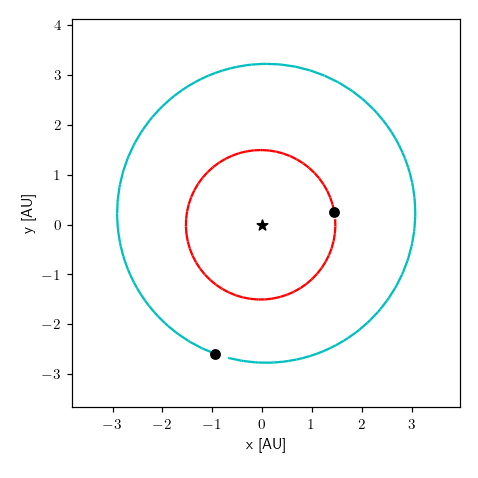

In [8]:
#Orbits plot
fig, ax = rb.OrbitPlot(sim, unitlabel='[AU]', orbit_type='solid', lw=1.5, color=True, figsize=(4,4))
fig.set_dpi(100)
fig.tight_layout()
plt.show()

Now we'll calculate the mean orbit periods who are very useful as a time step to simulate:

In [9]:
#Orbital periods
P1 = sim.particles['Particle #1'].P
n1 = 2*np.pi/P1
P2 = sim.particles['Particle #2'].P
n2 = 2*np.pi/P2

Now let's define the integration parameters in terms of the orbit period of the inner body:

In [10]:
#Integration parameters
sim.dt = P1/100
Nt = 1000
ts = np.linspace(0, 200000, Nt)

Finally let's do the integration refered to the central body reference system:

In [11]:
#Integration
Es = np.zeros((2,Nt,3))
for i,t in enumerate(tqdm(ts)):
    sim.integrate(t)
    sim.move_to_hel()
    orbits = sim.calculate_orbits()
    Es[0][i] = [orbits[0].a,
                orbits[0].e,
                np.mod(orbits[0].pomega,2*np.pi)]
    Es[1][i] = [orbits[1].a,
                orbits[1].e,
                np.mod(orbits[1].pomega,2*np.pi)]

100%|█████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.56it/s]


With the simulation done, we can split the array with the results in individual arrays for the orbital elements of each particle:

In [12]:
#Particle #1
a1 = Es[0,:,0]
e1 = Es[0,:,1]
pomega1 = Es[0,:,2] 

#Particle #2
a2 = Es[1,:,0]
e2 = Es[1,:,1]
pomega2 = Es[1,:,2]

Now we'll define a routine who given the semimajor axis, eccentricity and longitude of pericentre of the two main bodies at a certain time, it will plot the two osculating orbits and the vectors $h_j$ and $k_j$:

In [13]:
def vec_orbit_plot(a1, a2, e1, e2, pomega1, pomega2, L, i, Np=1000, s=1.1):
    #Excentricity vectors
    hvec = np.zeros(2)
    kvec = np.zeros(2)
    
    #Components
    hvec[0] = e1[i]*np.sin(pomega1[i])
    hvec[1] = e2[i]*np.sin(pomega2[i])
    
    kvec[0] = e1[i]*np.cos(pomega1[i])
    kvec[1] = e2[i]*np.cos(pomega2[i])
    
    #Orbits 
    f = np.linspace(0, 2*np.pi, Np)  #True anomaly
    p1 = a1[i]*(1-e1[i]**2)          #Semilatus rectum #1
    p2 = a2[i]*(1-e2[i]**2)          #Semilatus rectum #2
    
    ##Polar ellipse equation #1
    x1 = (p1/(1 + e1[i]*np.cos(f)))*np.cos(f)
    y1 = (p1/(1 + e1[i]*np.cos(f)))*np.sin(f)
    
    ##Polar ellipse equation #2
    x2 = (p2/(1 + e2[i]*np.cos(f)))*np.cos(f)
    y2 = (p2/(1 + e2[i]*np.cos(f)))*np.sin(f)
    
    ##Rotated coordinates #1
    x1_ = x1*np.cos(pomega1[i]) - y1*np.sin(pomega1[i])
    y1_ = x1*np.sin(pomega1[i]) + y1*np.cos(pomega1[i])
    
    ##Rotated coordinates #2
    x2_ = x2*np.cos(pomega2[i]) - y2*np.sin(pomega2[i])
    y2_ = x2*np.sin(pomega2[i]) + y2*np.cos(pomega2[i])
    
    a = max([a1[i],a2[i]])
    e = max([e1[i],e2[i]])
    
    #Complete Plot
    ##Orbits
    axs[0].text(-3.6, 3.3, r'$\varpi_1 =$ %.0f$^{\circ}$'%(pomega1[i]*rad))
    axs[0].text(1.4, 3.3,  r'$\varpi_2 =$ %.0f$^{\circ}$'%(pomega2[i]*rad))
    axs[0].set_xlabel('x [AU]', fontsize=12)
    axs[0].set_ylabel('y [AU]', fontsize=12)
    axs[0].set_xlim((-a*(1+e)*s,a*(1+e)*s))
    axs[0].set_ylim((-a*(1+e)*s,a*(1+e)*s))
    axs[0].plot(x1_, y1_, 'k-', lw=1)
    axs[0].plot(x2_, y2_, 'k-', lw=1)
    axs[0].plot([0],[0], 'y*', ms=5)
    axs[0].arrow(0, 0, a1[i]*(1-e1[i])*np.cos(pomega1[i]), a1[i]*(1-e1[i])*np.sin(pomega1[i]), color='r')
    axs[0].arrow(0, 0, a2[i]*(1-e2[i])*np.cos(pomega2[i]), a2[i]*(1-e2[i])*np.sin(pomega2[i]), color='r')
    axs[0].set_aspect('equal', 'box')
    ##Excentricity Vectors
    axs[1].set_xlim(-s*L,s*L)
    axs[1].set_ylim(-s*L,s*L)
    axs[1].text(1.15*hvec[0], 1.15*hvec[1], r'$\vec{h}$', fontsize=14)
    axs[1].text(1.15*kvec[0], 1.15*kvec[1], r'$\vec{k}$', fontsize=14)
    ####Axis
    axs[1].arrow(0, 0, 0.9*s*L, 0, color='k' , width=5e-4, head_length=0.005, head_width=0.003)
    axs[1].arrow(0, 0, 0, 0.9*s*L, color='k' , width=5e-4, head_length=0.005, head_width=0.003)
    axs[1].arrow(0, 0, -0.9*s*L, 0, color='k', width=5e-4, head_length=0.005, head_width=0.003)
    axs[1].arrow(0, 0, 0, -0.9*s*L, color='k', width=5e-4, head_length=0.005, head_width=0.003)
    ###Vectors
    axs[1].arrow(0, 0, hvec[0], hvec[1], color='b')
    axs[1].arrow(0, 0, kvec[0], kvec[1], color='r')
    ####Curves
    axs[1].plot(e1[:i]*np.sin(pomega1[:i]), e2[:i]*np.sin(pomega2[:i]), 'b--', lw=1)
    axs[1].plot(e1[:i]*np.cos(pomega1[:i]), e2[:i]*np.cos(pomega2[:i]), 'r--', lw=1)

Finally let's make an animation of the time evolution of the osculating orbits and the excentricity vectors (with the path they follow):

In [14]:
plt.ioff()
fig, axs = plt.subplots(1, 2, dpi=150, figsize=(7,3))
camera = cell.Camera(fig)

for i in range(len(e1)):
    vec_orbit_plot(a1, a2, e1, e2, pomega1, pomega2, 0.1, i, s=1.3)
    camera.snap()
    
plt.close()
plt.ion();

anim = camera.animate(interval=50)
anim.save("figs/orbits_vectors.mp4")

The animation is shown below:

In [15]:
HTML(anim.to_html5_video())

As we can see, the osculating orbits of the two bodies rotate with different velocity, connecting with the path followed by the eccentricity vectors. Yo should have noticed that the path followed by these vectors is bounded, thus they oscillate between the first and third quadrant.